# ACE Mission Data Cleaning and EDA

https://izw1.caltech.edu/ACE/ASC/level2/lvl2DATA_SWEPAM.html

SWEPAM Hourly Averaged Solar Wind Parameters  
Data downloaded from ACE Science Center on Wed Feb 28 21:20:51 2024  
SWEPAM Team Software Version: 3.30  
SWEPAM Team Time/Date Processed:   
ACE Science Center Level2 Software Version: 1.5  
ACE Science Center Processing Date/Time: Fri Nov 24 11:12:58 2023 PST  
  
  
Note: All timestamps are UT, and refer to the start of the time period.  
year,day,hr,min,sec: year, day of year, hour of day, minutes, seconds.  
- fp_year       : fractional year.  
- fp_doy        : fractional day-of-year.  
- ACEepoch      : seconds since Jan 1 00:00:00 UT 1996.  
- proton_density: Proton Density (cm^-3).  
- proton_temp   : Radial Component of proton temperature (deg. Kelvin).  
- He4toprotons  : Ratio of alphas/protons  
- proton_speed  : Proton Speed (km/s)  
- x,y,z_dot_GSE : X,Y,Z-component of proton velocity in GSE coordinates (km/s)  
- r,t,n_dot_RTN : R,T,N-component of proton velocity in RTN coordinates (km/s)  
- x,y,z_dot_GSM : X,Y,Z-component of proton velocity in GSM coordinates (km/s)  
- Electron_temp : Electron Temperature (deg. Kelvin).  
- pos_gse_x,y,z : Components of spacecraft position in GSE (km).  
- pos_gsm_x,y,z : Components of spacecraft position in GSM (km).  
- A value of -9999.9 indicates bad or missing data.  
  
More Documentation of the ACE SWEPAM level 2 data is at this web site:  
http://www.srl.caltech.edu/ACE/ASC/level2/swepam_l2desc.html  


In [1]:
import numpy as np
import pandas as pd
import re
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# read in file
file_path = "../data/ACE_Level2_Hourly"
ace_hourly = pd.read_csv(file_path, sep="\s+")
ace_hourly.head()

,year,day,hr,min,sec,fp_year,fp_doy,ACEepoch,proton_density,proton_temp,He4toprotons,proton_speed,x_dot_GSE,y_dot_GSE,z_dot_GSE,x_dot_RTN,y_dot_RTN,z_dot_RTN,x_dot_GSM,y_dot_GSM,z_dot_GSM,pos_gse_x,pos_gse_y,pos_gse_z,pos_gsm_x,pos_gsm_y,pos_gsm_z,Electron_temp,fraction_time_proton_density,fraction_time_proton_temp,fraction_time_He4toprotons,fraction_time_proton_speed,fraction_time_dot_GSE,fraction_time_dot_RTN,fraction_time_Electron_temp,weight
0,1998,23,0,0,0.0,1998.060274,23.000000,65059200.0,-9999.9,-9999.9,-9999.9004,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1458500.0,233870.0,79236.0,1458500.0,182070.0,166800.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1998,23,1,0,0.0,1998.060388,23.041667,65062800.0,-9999.9,-9999.9,-9999.9004,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1458700.0,233870.0,79434.0,1458700.0,185870.0,162650.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1998,23,2,0,0.0,1998.060502,23.083333,65066400.0,-9999.9,-9999.9,-9999.9004,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1458800.0,233860.0,79632.0,1458800.0,191510.0,156070.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1998,23,3,0,0.0,1998.060616,23.125000,65070000.0,-9999.9,-9999.9,-9999.9004,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1459000.0,233860.0,79830.0,1459000.0,198420.0,147290.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1998,23,4,0,0.0,1998.060731,23.166667,65073600.0,-9999.9,-9999.9,-9999.9004,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,-9999.9,1459200.0,233860.0,80027.0,1459200.0,205850.0,136820.0,-10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
# explore columns
print(len(ace_hourly.columns))
ace_hourly.columns

36


Index(['year', 'day', 'hr', 'min', 'sec', 'fp_year', 'fp_doy', 'ACEepoch',
       'proton_density', 'proton_temp', 'He4toprotons', 'proton_speed',
       'x_dot_GSE', 'y_dot_GSE', 'z_dot_GSE', 'x_dot_RTN', 'y_dot_RTN',
       'z_dot_RTN', 'x_dot_GSM', 'y_dot_GSM', 'z_dot_GSM', 'pos_gse_x',
       'pos_gse_y', 'pos_gse_z', 'pos_gsm_x', 'pos_gsm_y', 'pos_gsm_z',
       'Electron_temp', 'fraction_time_proton_density',
       'fraction_time_proton_temp', 'fraction_time_He4toprotons',
       'fraction_time_proton_speed', 'fraction_time_dot_GSE',
       'fraction_time_dot_RTN', 'fraction_time_Electron_temp', 'weight'],
      dtype='object')

In [4]:
# explore the spread of the data
ace_hourly.drop(
    columns=["year", "day", "hr", "min", "sec", "fp_year", "fp_doy", "ACEepoch"]
).describe()

,proton_density,proton_temp,He4toprotons,proton_speed,x_dot_GSE,y_dot_GSE,z_dot_GSE,x_dot_RTN,y_dot_RTN,z_dot_RTN,x_dot_GSM,y_dot_GSM,z_dot_GSM,pos_gse_x,pos_gse_y,pos_gse_z,pos_gsm_x,pos_gsm_y,pos_gsm_z,Electron_temp,fraction_time_proton_density,fraction_time_proton_temp,fraction_time_He4toprotons,fraction_time_proton_speed,fraction_time_dot_GSE,fraction_time_dot_RTN,fraction_time_Electron_temp,weight
count,204768.000000,2.047680e+05,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,2.047680e+05,204768.000000,204768.000000,2.047680e+05,204768.000000,204768.000000,204768.0,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.000000,204768.0,204768.000000
mean,-3583.192620,7.729277e+04,-4039.195095,284.306873,-561.650643,-140.401359,-144.888509,280.170499,-141.045238,-144.838160,-561.650643,-140.036662,-144.685010,1.486136e+06,-656.145375,1833.577189,1.486136e+06,-578.364324,3640.350963,-10000.0,0.580415,0.799835,0.518758,0.931895,0.930986,0.930986,0.0,32.649042
std,4798.960802,7.644430e+04,4906.807287,1221.741970,1132.031778,1178.295150,1177.696664,1232.257540,1178.217030,1177.701701,1132.031778,1178.336185,1177.725826,5.888855e+04,180961.952805,106200.769248,5.888855e+04,175166.125295,115468.042694,0.0,0.450590,0.333071,0.448238,0.130196,0.131082,0.131082,0.0,25.348204
min,-9999.900000,-9.999900e+03,-9999.900400,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,-9999.900000,1.380900e+06,-267010.000000,-161550.000000,1.380900e+06,-296280.000000,-265280.000000,-10000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-9999.900000,2.743475e+04,-9999.900400,353.280000,-484.392500,-16.770000,-19.190000,352.037500,-15.232500,-19.092500,-484.392500,-16.350000,-19.240000,1.434100e+06,-181670.000000,-104130.000000,1.434100e+06,-168230.000000,-87177.000000,-10000.0,0.000000,0.892900,0.000000,0.946400,0.946400,0.946400,0.0,0.000000
50%,2.873000,5.912100e+04,0.013100,405.260000,-407.060000,-1.570000,-5.090000,403.780000,0.790000,-5.040000,-407.060000,-1.280000,-4.750000,1.483100e+06,-1560.300000,2592.050000,1.483100e+06,-1386.250000,9371.950000,-10000.0,0.912300,0.947400,0.789500,0.964300,0.964300,0.964300,0.0,52.000000
75%,5.424000,1.105325e+05,0.032200,479.880000,-354.877500,14.210000,9.960000,478.000000,15.760000,10.042500,-354.877500,14.610000,10.210000,1.539300e+06,180400.000000,107712.500000,1.539300e+06,166140.000000,104800.000000,-10000.0,0.964300,0.964300,0.946400,0.964300,0.964300,0.964300,0.0,54.000000
max,104.335000,1.156600e+06,0.345400,1187.890000,-226.700000,290.840000,358.400000,1183.730000,212.810000,341.180000,-226.700000,292.380000,375.470000,1.594800e+06,268000.000000,164090.000000,1.594800e+06,298140.000000,241120.000000,-10000.0,0.982500,0.982500,0.982500,0.982500,0.982500,0.982500,0.0,56.000000


Electron temp has the same value for all readings, so it will not be helpful in determining characteristics of solar winds. This column will not be included in our models.

In [5]:
# At least 25% of rows do not contain proton density data. Do these rows cover a certain time frame?
ace_hourly[ace_hourly["proton_density"] == -9999.9][["year", "day"]].describe()

,year,day
count,73450.000000,73450.000000
mean,2012.271314,179.522437
std,5.500618,104.868019
min,1998.000000,1.000000
25%,2009.000000,94.000000
50%,2012.000000,178.000000
75%,2017.000000,273.000000
max,2021.000000,366.000000


The bad values for proton density seem to be spread throughout the years and the days, so it should be safe to drop these rows without affecting the larger dataset.

In [6]:
# how many rows would we have if we dropped any rows that had bad data?
print(len(ace_hourly))
ace = ace_hourly[~ace_hourly.eq(-9999.9).any(axis=1)].drop(
    columns=["Electron_temp", "fraction_time_Electron_temp"]
)
ace = ace[ace["He4toprotons"] != -9999.9004]
print(len(ace))
# cuts the data set in half, but still have a lot of rows

# how would the distribution for that data look after these drops??
ace.drop(
    columns=["year", "day", "hr", "min", "sec", "fp_year", "fp_doy", "ACEepoch"]
).describe()

204768
121969


,proton_density,proton_temp,He4toprotons,proton_speed,x_dot_GSE,y_dot_GSE,z_dot_GSE,x_dot_RTN,y_dot_RTN,z_dot_RTN,x_dot_GSM,y_dot_GSM,z_dot_GSM,pos_gse_x,pos_gse_y,pos_gse_z,pos_gsm_x,pos_gsm_y,pos_gsm_z,fraction_time_proton_density,fraction_time_proton_temp,fraction_time_He4toprotons,fraction_time_proton_speed,fraction_time_dot_GSE,fraction_time_dot_RTN,weight
count,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,1.219690e+05,121969.000000,121969.000000,1.219690e+05,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000,121969.000000
mean,5.862216,92497.904954,0.031632,457.815334,-456.440046,0.552745,-5.143244,456.442997,-0.400860,-5.084318,-456.440046,1.028690,-4.863078,1.486720e+06,25696.493739,189.653386,1.486720e+06,25411.188295,3221.766883,0.908420,0.946608,0.870557,0.956437,0.955726,0.955726,51.099722
std,4.676919,67220.238994,0.020983,95.953200,95.703506,24.022682,21.572934,95.705416,24.038164,21.502125,95.703506,23.942088,21.812853,5.720259e+04,182758.040072,109618.335885,5.720259e+04,176510.921917,119435.413484,0.146415,0.075158,0.175888,0.043907,0.044225,0.044225,8.245453
min,0.181000,2275.500000,0.000400,276.580000,-1026.210000,-142.380000,-190.520000,276.320000,-207.950000,-195.940000,-1026.210000,-145.770000,-181.670000,1.380900e+06,-267010.000000,-161550.000000,1.380900e+06,-296060.000000,-265280.000000,0.017540,0.017540,0.017540,0.017540,0.017540,0.017540,1.000000
25%,3.081000,42756.000000,0.017600,384.540000,-510.710000,-14.970000,-18.780000,383.350000,-14.110000,-18.640000,-510.710000,-14.390000,-18.640000,1.435200e+06,-162360.000000,-111550.000000,1.435200e+06,-149180.000000,-95931.000000,0.928600,0.946400,0.875000,0.964300,0.947400,0.947400,52.000000
50%,4.589000,74567.000000,0.028800,433.680000,-432.410000,-0.660000,-5.720000,432.410000,0.820000,-5.660000,-432.410000,-0.320000,-5.190000,1.484400e+06,57563.000000,-859.460000,1.484400e+06,53448.000000,7573.600000,0.964300,0.964300,0.946400,0.964300,0.964300,0.964300,54.000000
75%,7.004000,124230.000000,0.040800,512.230000,-383.350000,14.260000,8.560000,510.720000,15.120000,8.620000,-383.350000,14.780000,8.830000,1.537600e+06,204820.000000,113010.000000,1.537600e+06,190420.000000,111340.000000,0.964300,0.964900,0.964300,0.964900,0.964900,0.964900,54.000000
max,104.335000,830160.000000,0.345400,1027.570000,-276.320000,205.350000,358.400000,1026.290000,148.820000,341.180000,-276.320000,202.550000,375.470000,1.594800e+06,268000.000000,164090.000000,1.594800e+06,298010.000000,241120.000000,0.982500,0.982500,0.982500,0.982500,0.982500,0.982500,56.000000


In [7]:
# what is the difference between base and fraction time columns?
ace[["proton_density", "fraction_time_proton_density"]]

# after consulting with Dr. Zhao, we've determined that the multiple velocity vector columns as well as the fraction time columns are not of interest
# and so they will not be included in our final dataset. Satellite metadata is also unnecessary.

,proton_density,fraction_time_proton_density
312,16.655,0.9821
313,20.601,0.9649
314,18.679,0.9643
315,18.481,0.9464
316,28.315,0.9464
...,...,...
204599,21.633,0.8571
204600,15.237,0.6786
204601,14.267,0.5965
204602,16.321,0.6071


In [9]:
# while fp year and day are not needed for exploring solar wind clusters, the ace mission data may be useful when trying to forecast the HCS indexes so these columns
# will be kept for that purpose

ace_clean = ace[
    [
        "fp_year",
        "fp_doy",
        "proton_density",
        "proton_temp",
        "He4toprotons",
        "proton_speed",
    ]
]
ace_clean.to_csv("../data/ACE Mission Cleaned.csv", index=False)
ace_clean

,fp_year,fp_doy,proton_density,proton_temp,He4toprotons,proton_speed
312,1998.095890,36.000000,16.655,9529.1,0.0127,323.90
313,1998.096005,36.041667,20.601,8757.7,0.0141,322.89
314,1998.096119,36.083333,18.679,9559.4,0.0087,324.61
315,1998.096233,36.125000,18.481,8965.9,0.0051,322.68
316,1998.096347,36.166667,28.315,8329.0,0.0061,321.84
...,...,...,...,...,...,...
204599,2021.399886,146.958333,21.633,16637.0,0.0830,395.15
204600,2021.400000,147.000000,15.237,27602.0,0.0749,399.00
204601,2021.400114,147.041667,14.267,12818.0,0.1410,398.13
204602,2021.400228,147.083333,16.321,20856.0,0.1186,398.04


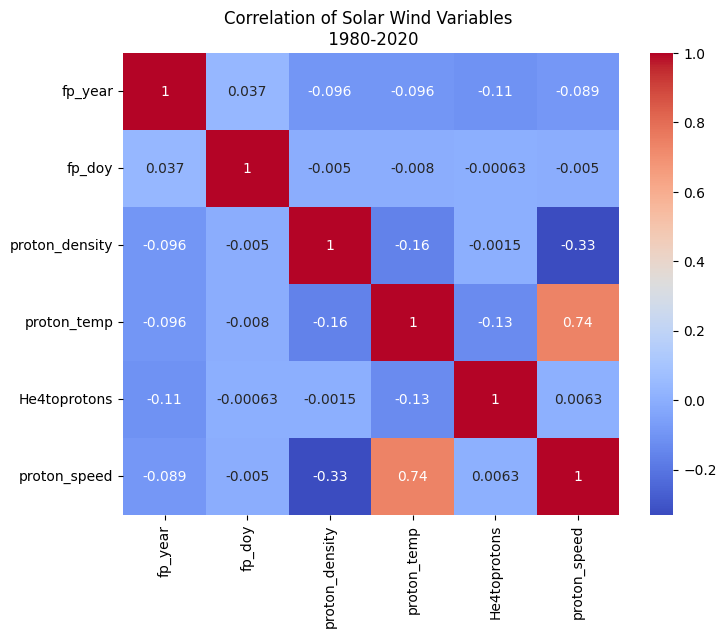

In [10]:
# look at correlations of the data variables

features = ["proton_density", "proton_temp", "He4toprotons", "proton_speed"]

# assign data correlation matrix
corr = ace_clean.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Solar Wind Variables \n 1980-2020")
plt.show()

Temperature is very correlated with speed, because higher temps speed up particles

Temperature is negatively correlated to He to proton ratio, is this because He is spent to raise temperature?

Speed is negatively correlated with density, however temp is not as strongly correlated with density - why does speed lead to lower density, even without the effect of temperature?

Now that we have a cleaned dataset we can use the data for clustering to find important features. Please refer to the <a href="../src/02_ACE_Mission_Kmeans.ipynb"> ACE Mission Kmeans </a> notebook for next steps. 